In [1]:
import numpy as np
from matplotlib import pyplot as plt

The area of the dish is:

$A_d = \pi R^2$

Effective area:

$A_e = -2\pi\sigma^2[exp(-R^2/2\sigma^2)-1]$

The total beam integral is:

$B_t = 2 \pi \sigma$

With this information in hand, we can say that the fraction of the beam that arrives at the primary, will be:

$A_f = A_e/B_t$ 

In [6]:
R = 1
A_d = R**2 * np.pi
sigmas = np.linspace(0.1, 10, 100)

A_e = np.zeros(len(sigmas)) #effective area
B_t = np.zeros(len(sigmas)) #total beam

for i in range (len(sigmas)):
    A_e[i] = -2 * np.pi * sigmas[i]**2 * (np.exp(-R**2/(2 * sigmas[i]**2)) - 1)
    B_t[i]= (2 * np.pi * sigmas[i]**2)

A_n = A_e/A_d            # normalized area    
A_f = A_e/B_t            # arrived beams
signals = A_n * A_f

In [12]:
print("Value of sigma which maximizes the signal at the feed is: ", sigmas[np.argmax(signals)])
print("Aeff/A at the peak is: ", A_n[np.argmax(signals)])
print("The fraction of the beam that ends up off of the primary is: ", 1 - A_f[np.argmax(signals)])

Value of sigma which maximizes the signal at the feed is:  0.6
Aeff/A at the peak is:  0.5404664096803468
The fraction of the beam that ends up off of the primary is:  0.24935220877729625


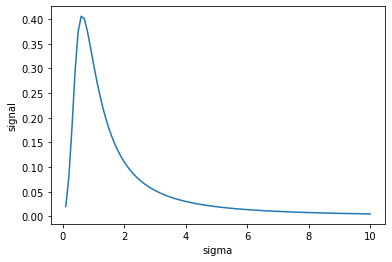

In [11]:
plt.plot(sigmas,signals)
plt.xlabel('sigma')
plt.ylabel('signal')
plt.show()

To calculate the $\delta T $, we use the fact that:

$\delta T = T_{sys}/\sqrt Bt$

In [5]:
B = 1.4e9
t = 120

T_g = 300 * (1 - A_f[np.argmax(signals)])
T_n = 25

Tsys = T_g + T_n
delta_T = Tsys / np.sqrt(B * t)

print(delta_T)

0.00032950376289923167
